## NAME: Pradyumna Revur
# CSCI S-89 DEEP LEARNING
# ASSIGNMENT 1

### Problem 1 (45 points)
Please load ‘Housing_Data.csv’, the housing data for Singapore. This data set is also available at https://www.kaggle.com/chenzhiliang/housing-data. Using Keras, build a Neural Network with one hidden layer which has two neurons to predict the price based on ‘floorArea’ and ‘bedrooms’. You may implement either batch or mini-batch gradient descent algorithm. Make sure to use appropriate loss and activation functions. Plot the train and test errors versus iteration step.


### SOLUTION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24564 entries, 0 to 24563
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   value      24564 non-null  float64
 1   floorArea  24563 non-null  float64
 2   bedrooms   24564 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 575.8 KB


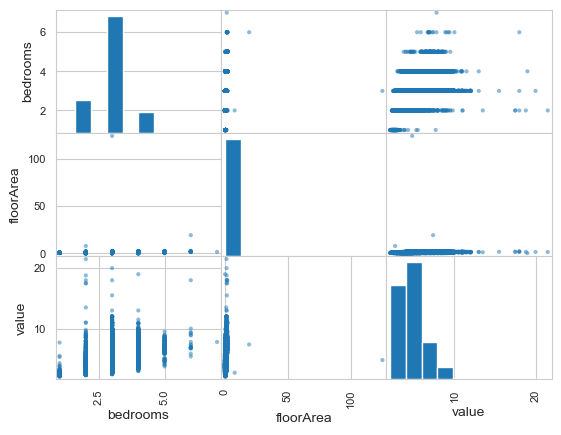

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

# Parse data into data frame
df_housing = pd.read_csv('data/Housing_Data.csv', usecols=['bedrooms', 'floorArea', 'value'],
                         converters={'bedrooms': lambda x: pd.to_numeric(x, errors='coerce'),
                                     'floorArea': lambda x: pd.to_numeric(x, errors='coerce') / 1000,
                                     'value': lambda x: pd.to_numeric(x, errors='coerce') / 100000})

# print info
df_housing.info()
scatter_matrix(df_housing[['bedrooms', 'floorArea', 'value']])
plt.show()

### Construct model
- Input layer with two nodes for floor area and number of bedrooms
- One hidden layer with two nodes
- Output layer with one node to output the predicted home value

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.5182 - mae: 4.9441 - val_loss: 25.6233 - val_mae: 4.7786
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - loss: 23.9897 - mae: 4.6660 - val_loss: 23.8669 - val_mae: 4.5481
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 22.3626 - mae: 4.4670 - val_loss: 22.3824 - val_mae: 4.3877
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 20.8665 - mae: 4.2953 - val_loss: 20.9552 - val_mae: 4.2328
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 19.6754 - mae: 4.1557 - val_loss: 19.6139 - val_mae: 4.0785
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 18.3909 - mae: 3.9919 - val_loss: 18.3508 - val_mae: 3.9245
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 16.9832 - mae: 3.8245 - val_loss: 17.1548 - val_mae: 3.7708
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 15.9015 - mae: 3.6757 - val_loss: 15.9982 - val_mae: 3.6171
Epoch 9/10
154/154 ━━━━━━━

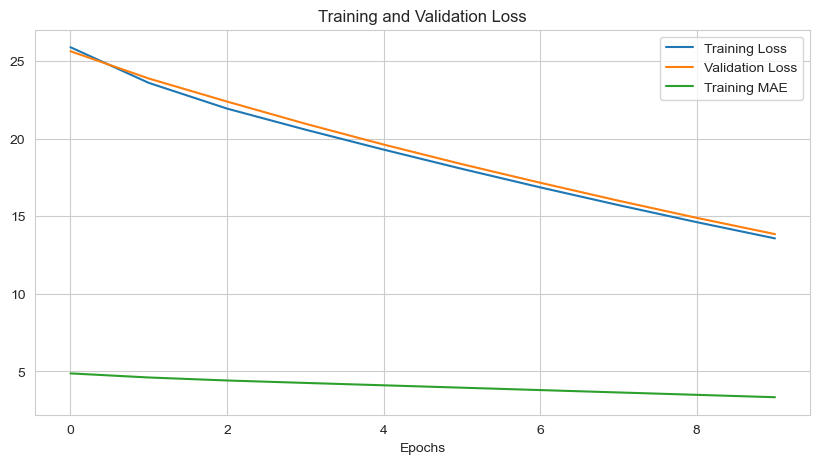

In [14]:
from keras import models
from keras import layers
from keras import Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create copies

X = df_housing[['bedrooms', 'floorArea']].copy()
y = df_housing['value'].copy()

# drop missing data

X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split 80/20 into train and test set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

n = 2  #2 inputs - floor area and number of bedrooms

model = models.Sequential()
model.add(Input(shape=(n,)))  # input
model.add(layers.Dense(2, activation='relu'))  # hidden layer with 2 nodes
model.add(layers.Dense(1))  # output - predicted value

model.summary()

nepochs = 10

model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=nepochs, batch_size=128, verbose=1,
                    validation_split=0.2)

# Plot training and validation loss

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mae'], label='Training MAE')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()